# Bayesian A/B testing 

In [43]:
%matplotlib inline
from matplotlib import pyplot as plt
from numpy.random import beta
plt.style.use('ggplot')

N_samp = 5000

# Placed your prior believe
prior_a = 1.0
prior_b = 1.0

# Placed convertion data from your experiment
views_a = 6037
views_b = 6040
clicks_a = 3254
clicks_b = 3576

A_sample = beta(clicks_a+prior_a , views_a - clicks_a + prior_b , N_samp)
B_sample = beta(clicks_b+prior_a , views_a - clicks_b + prior_b , N_samp)

## Check posterior distributions

C:\Users\OLX - Lucas Dresi\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


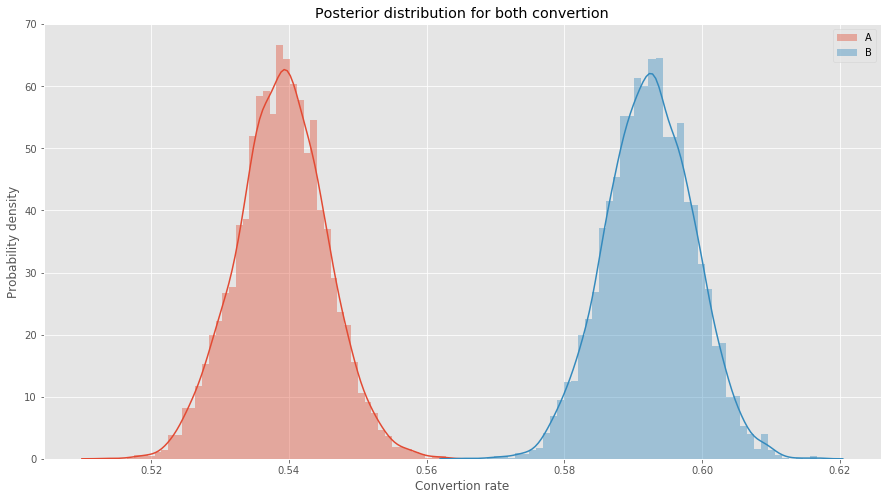

In [44]:
fig , ax = plt.subplots(1,1,figsize=(15,8))
sns.distplot(A_sample , label='A')
sns.distplot(B_sample , label='B')
ax.legend()

ax.set_xlabel('Convertion rate')
ax.set_ylabel('Probability density')
ax.set_title('Posterior distribution for both convertion')

f.savefig('2_stations_vs_time.png')

## Using abyes package so as to add decision rule

In [41]:
import abyes as ab

how to import abyes : https://github.com/cbellei/abyes

C:\Users\OLX - Lucas Dresi\Anaconda3\lib\site-packages\abyes\ab_exp.py:145: VisibleDeprecationWarning: Passing `normed=True` on non-uniform bins has always been broken, and computes neither the probability density function nor the probability mass function. The result is only correct if the bins are uniform, when density=True will produce the same result anyway. The argument will be removed in a future version of numpy.
  lift = np.histogram(rvs, bins=bins, normed=True)
C:\Users\OLX - Lucas Dresi\Anaconda3\lib\site-packages\abyes\ab_exp.py:150: VisibleDeprecationWarning: Passing `normed=True` on non-uniform bins has always been broken, and computes neither the probability density function nor the probability mass function. The result is only correct if the bins are uniform, when density=True will produce the same result anyway. The argument will be removed in a future version of numpy.
  psigma_a = np.histogram(sigma_a_rvs, bins=bins, normed=True)
C:\Users\OLX - Lucas Dresi\Anaconda3\l


*** abyes ***

Method = analytic
Decision Rule = loss
Threshold of Caring = 0.01
Decision Variable = lift

Result is conclusive: B variant is winner!



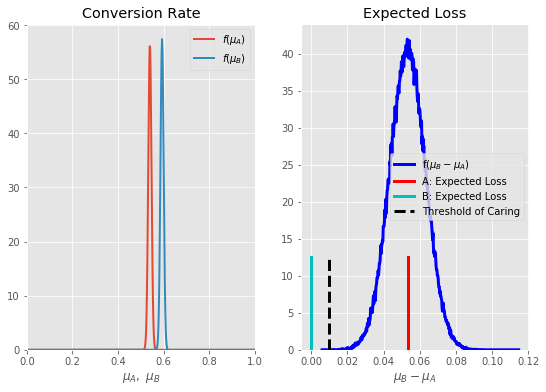

In [51]:
data = [ beta(clicks_a+prior_a , views_a - clicks_a + prior_b , N_samp) , beta(clicks_b+prior_a , views_a - clicks_b + prior_b , N_samp)]

exp = ab.AbExp(method='analytic', decision_var = 'lift', rule='loss', toc=0.01, plot=True)
exp.experiment(data)